In [1]:
%matplotlib inline
from pylab import *
from sci378 import *
import pandas as pd

Version:  0.0.25


In [2]:
from pyndamics3 import Simulation


pyndamics3  version  0.0.31


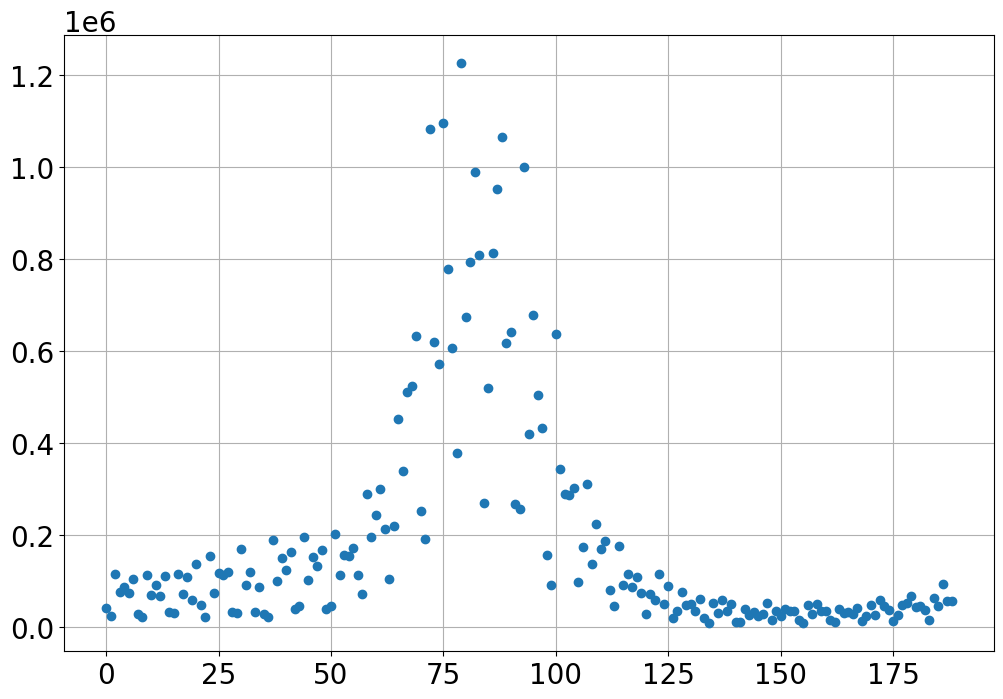

In [3]:
data=pd.read_csv('../data/covid_data.csv')
data

t=arange(len(data['date']))
z=array(data['infected'])

t_data=t[(t>600) & (t<790)]
z_data=z[(t>600) & (t<790)]

t_data=t_data-min(t_data)
plot(t_data,z_data,'o')

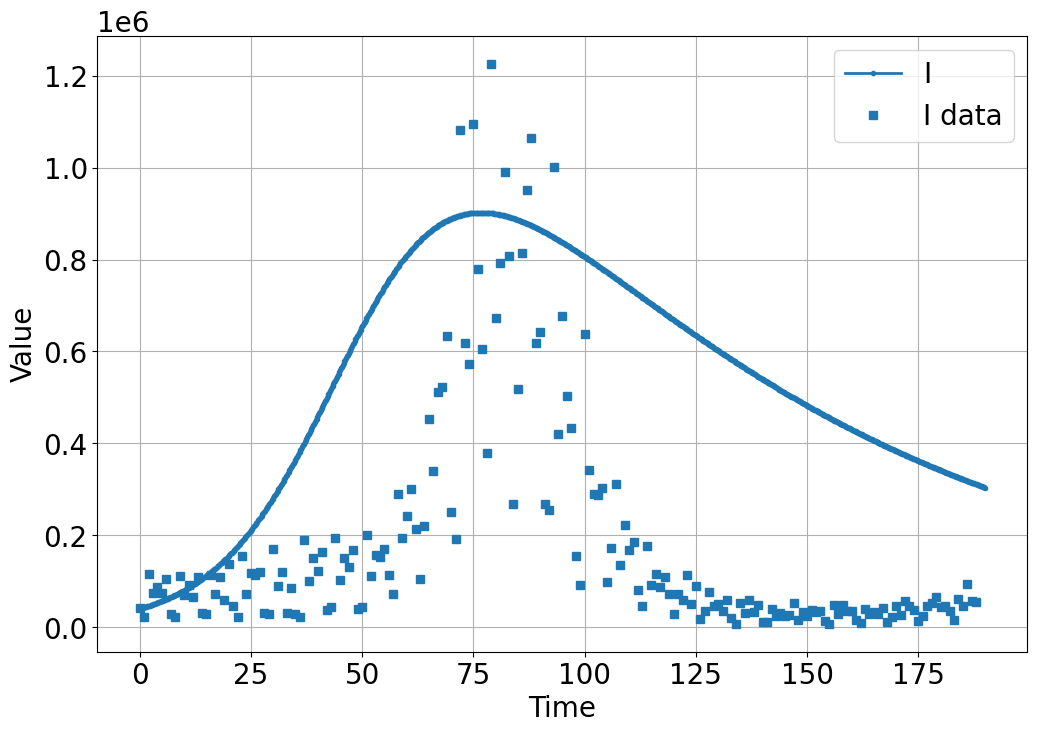

<Figure size 1200x800 with 0 Axes>

In [51]:
sim=Simulation()
sim.add(" S' = -β*S*I/N   ",1500000)
sim.add(" I' = β*S*I/N - γ*I",40000,plot=True)
sim.add(" R' = γ*I",1200)
sim.add(" N = S+I+R")
sim.params(β=.085,γ=.012)
sim.add_data(t=t_data,I=z_data,plot=True)
sim.run(190)

In [52]:
from pyndamics3.mcmc import *

In [53]:
model=MCMCModel(sim,
                γ=Uniform(0,.1), 
                β=Normal(.085,.1,all_positive=True),
                initial_I=Normal(40000,1000,all_positive=True),
               )

Sampling Prior...
Done.
0.91 s
Running MCMC 1/3...
Done.
1 m, 17.96 s
Running MCMC 2/3...
Done.
57.79 s
Running MCMC 3/3...
Done.
55.24 s


<Figure size 1200x800 with 0 Axes>

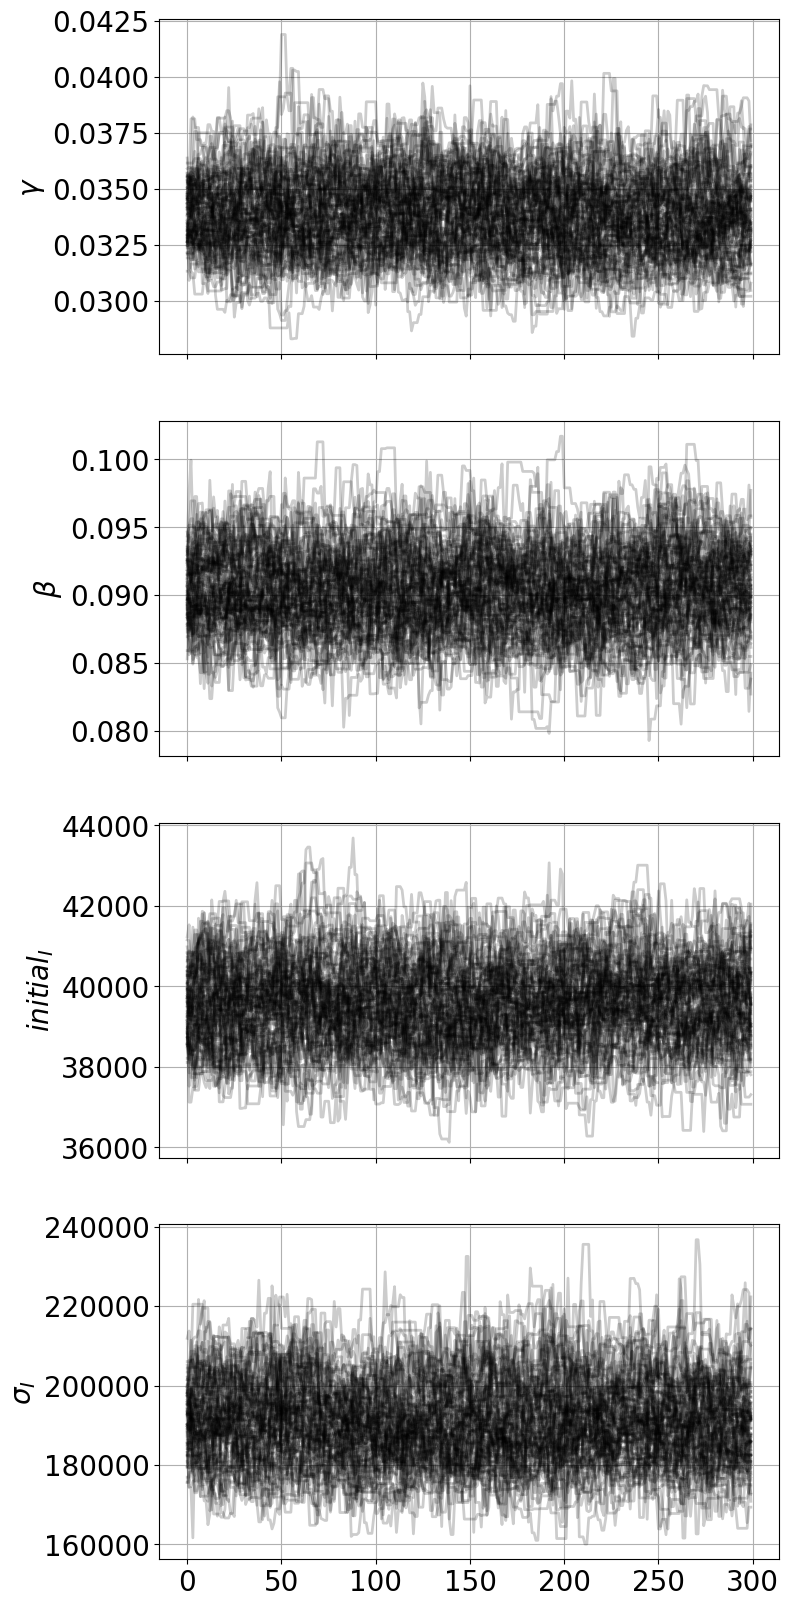

In [54]:
model.run_mcmc(300,repeat=3)
model.plot_chains()

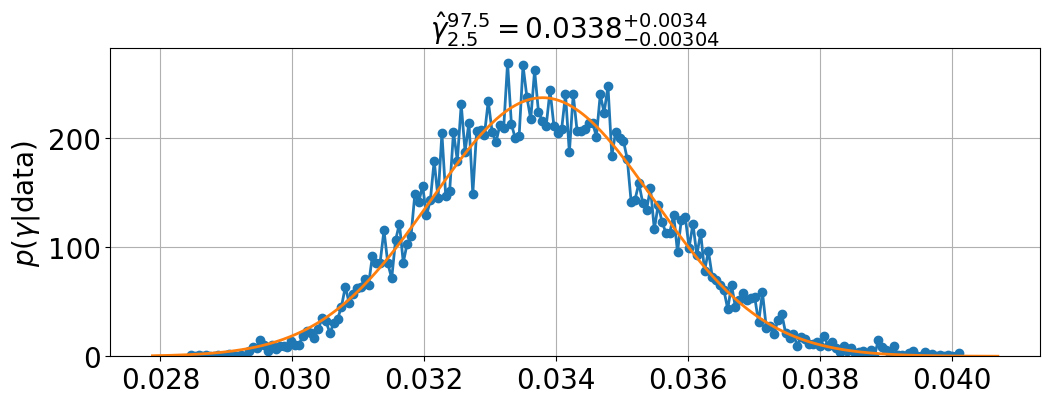

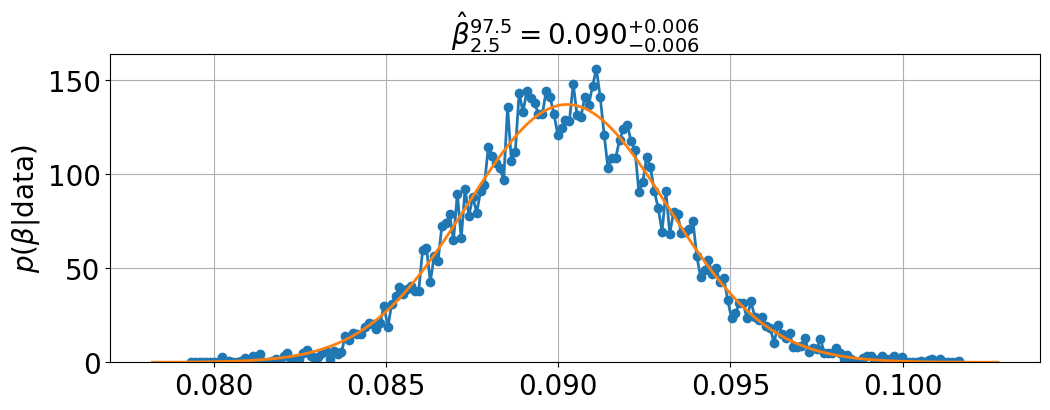

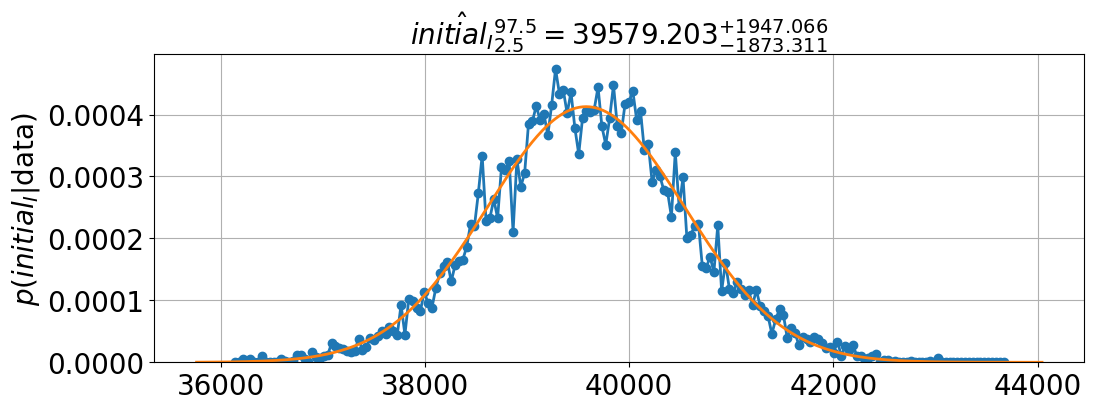

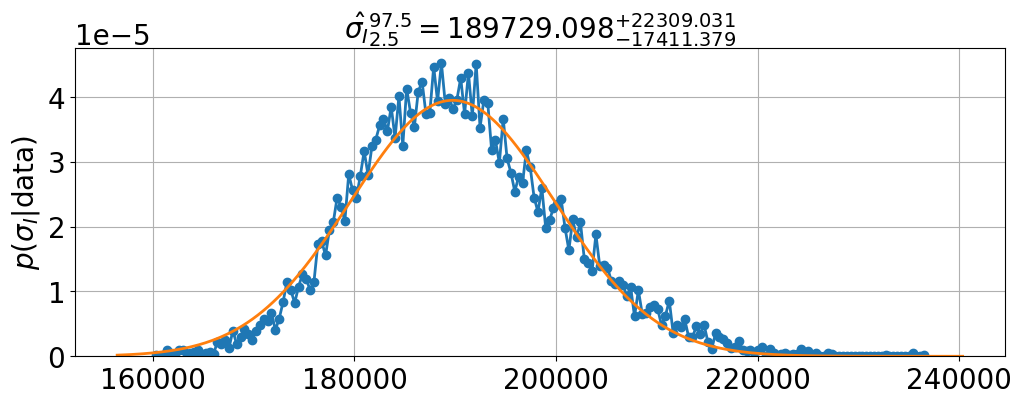

In [55]:
model.plot_distributions()

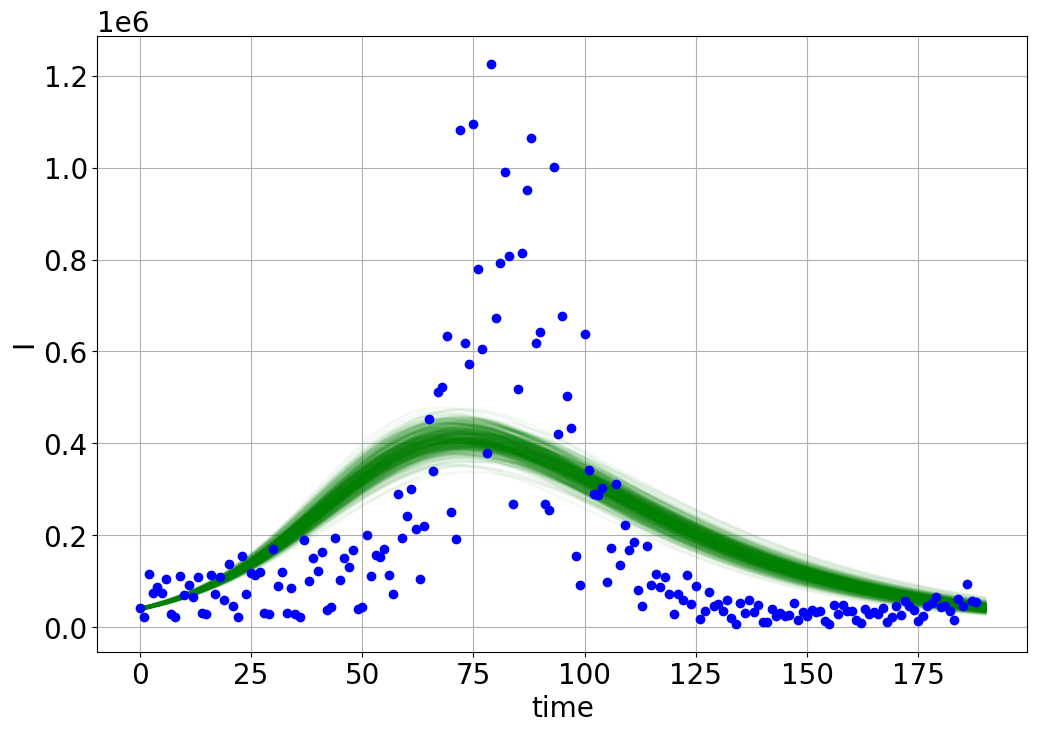

In [56]:
model.plot_many(0,190,'I',N=400)